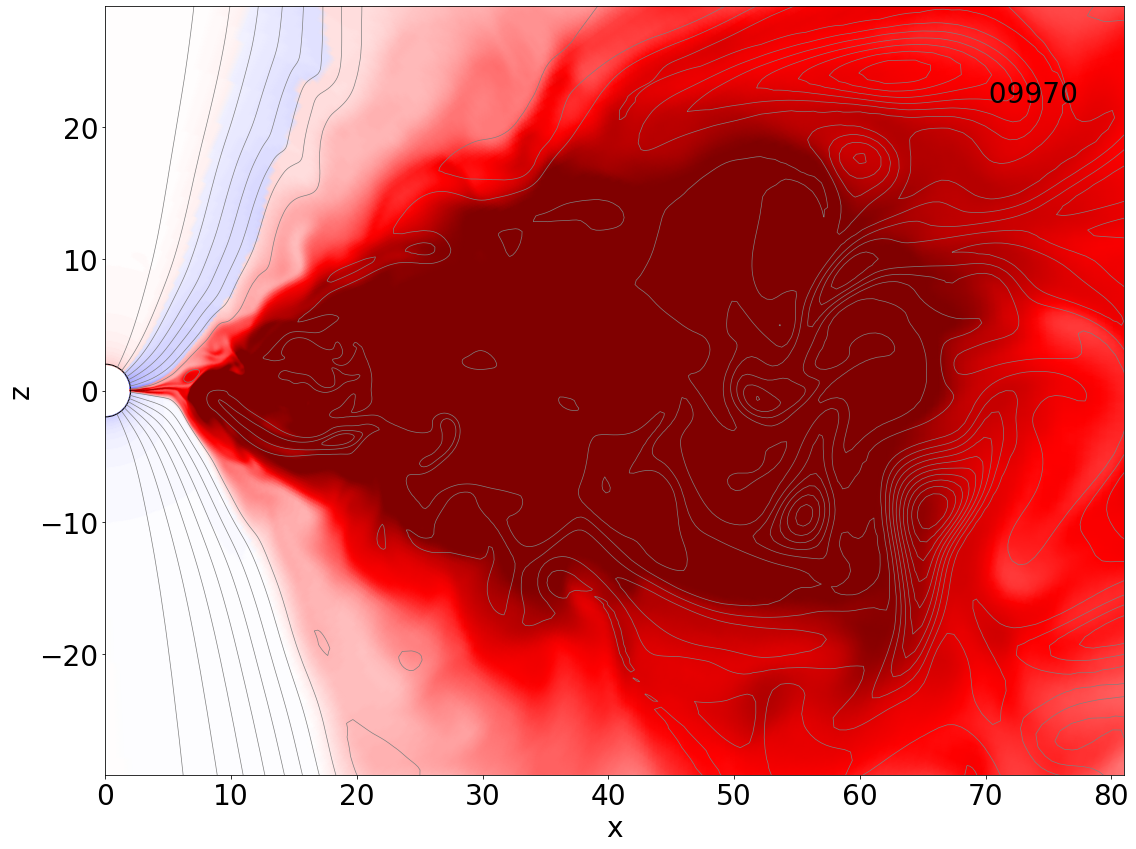

In [2]:
#PLOTTING DENSITY MAP



import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import h5py as hdf
import math
from scipy.interpolate import griddata

def jet_torus(x, z, k, rh):
    return ( (x**2 + z**2)**(k/2 ))*( 1 - ((z**2)/(x**2 + z**2))**0.5 ) - rh**k


def fig_beta(path,dumpNO,text,lincnt,barva,see):
    global fig, Bx, x
    
    f=hdf.File(path+"dump"+dumpNO+".h5","r")
    f2=hdf.File(path+"coords.h5","r")
    
    N1 = f2['N1'][()]
    N2 = f2['N2'][()]
    a  = f2['a'][()] 
    dx2 = f2['dx2'][()]
    r = f2['r'][()]
    th = f2['th'][()]
    ph = f2['ph'][()]

   
    Rho = f['Rho'][()]
    t = f['t'][()]
    B1B2B3gdet = f['B1B2B3gdet'][()]
    ucon = f['ucon'][()]
    ucov = f['ucov'][()]
    bcon = f['bcon'][()]
    
    Th = np.pi*(th[:,:,:])
    Ph = np.pi*(ph[:,:,:])
    X = r[:,:,:]*np.sin(th[:,:,:])*np.cos(ph[:,:,:])   #radian
    Y = r[:,:,:]*np.sin(th[:,:,:])*np.sin(ph[:,:,:])
    Z = r[:,:,:]*np.cos(th[:,:,:])   #radian

    plt.figure(figsize=(16,12))
    plt.rcParams.update({'font.size': 28})
    plt.axis([0, see, -0.36*see, 0.36*see])
    #plt.axis([0,80, -20,20 ])
    plt.tight_layout()
    plt.ylabel('z') 
    plt.xlabel('x')

    # mass density
    fRho=np.sqrt(Rho[:,:,0].flatten()); fAng=-np.sign(ucov[:,:,0,3]).flatten(); # color density
    colrho=min( np.abs(max(fAng*fRho)), np.abs(min(fAng*fRho)) ) # you can set 0<colrho<1 by hand
    colrho=0.3
    # signum of ang. momentum * mass density distribution
    cs=plt.pcolormesh(X[:,:,0],Z[:,:,0],-np.sign(ucov[:,:,0,3])*np.sqrt(Rho[:,:,0]), shading='gouraud', 
               vmin=-colrho, vmax = colrho, cmap="seismic")
    #plt.colorbar()

    
    # mag. field lines
    BB = B1B2B3gdet[:,:,:,0]; daphi = -BB[:,:,0]*dx2; aphi=daphi[:,::-1].cumsum(axis=1)[:,::-1]
    contour_levels = np.linspace(aphi.min(),aphi.max(),lincnt)[1:-1]
    plt.contour(X[:,:,0],Z[:,:,0], aphi, levels=contour_levels, linestyles="solid", colors="gray", linewidths=0.7)

    #TEXT
    
    plt.text(0.85*see, 0.27*see, text+"  "+str(int(t)).zfill(5), color=barva, size=28)
    hor = (1. + np.sqrt(1. - a*a)) # BH horizon
    bhhor=plt.Circle((0,0),hor, edgecolor='black', facecolor='None') # BH horizon
    plt.gcf().gca().add_artist(bhhor) # BH horizon

    
    #SAVING FIGURE
    
    #plt.savefig("pic-directory"+dumpNO+".png",bbox_inches = 'tight', pad_inches = 0.1)
    #plt.close()
nazev=""    
    
fig_beta("dump directory","1000",nazev,20,"black",81)

In [ ]:
#PLOTTING ACCRETION RATES

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import h5py as hdf
import math
def load_enerX(fname,pos):
     global t,dm

     data = np.loadtxt(fname)

     t = data[:,0]
     dm = data[:,pos] # 4-old 6-new

     return()


fig, ax1 = plt.subplots(1,1)
ax1.axis([0, 10080, 1*1e-4, 30])
ax1.set_xlabel('t [M]')
ax1.set_ylabel('accretion rate')

cesta="/media/bardiev/Disk/codes/FM/better/A/";
misto=6 # or 7 ?

load_enerX(cesta+"A1/exe/ener.out",misto); t1=t; dm1=dm
load_enerX(cesta+"A2/exe/ener.out",misto); t2=t; dm2=dm



ax1.semilogy(t1, -dm1, 'red',    label= 'A1')
ax1.semilogy(t2, -dm2, 'blue',  label='A2')

ax2 = ax1.twiny()
ax2.set_xlabel('orbits around black hole')
ax1.legend(loc='upper right', bbox_to_anchor=(0.8, 0.36))
orbit=363 # Schw r=16  #orbit=234; # r=12 an spin
hodnoty = ax1.get_xlim(); rozmezi=(hodnoty[0]/orbit,hodnoty[1]/orbit);
ax2.set_xlim(rozmezi)

fig.set_size_inches(12,6)
fig.tight_layout()

fig.savefig("acrates.jpg")